In [98]:
# Imports.
import pandas as pd
import numpy as np
from collections import OrderedDict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [83]:
# Read the processed classification dataset - contains top 30% and bottom 30% rows for each category. 
df_full = pd.read_csv('final_classification_dataset.csv')
#df_full["category"].unique()

In [84]:
# create a new dataframe with all Categories except - Sports & Outdoors.
# df_beauty = df_full[df_full.category=='Beauty']
# df_beauty = df_full[df_full.category=='Health & Personal Care']
# df_beauty = df_full[df_full.category=='Grocery & Gourmet Food']
# df_beauty = df_full[df_full.category=='Sports &amp; Outdoors']
df_beauty = df_full[df_full.category!='Sports &amp; Outdoors']
df_beauty.shape

(12058, 404)

In [85]:
# Drop columns - Category, salesRank and ASIN.
df_beauty = df_beauty.drop('category',axis=1)
df_beauty = df_beauty.drop('salesRank',axis=1)
df_beauty = df_beauty.drop('ASIN',axis=1)

In [68]:
#df_beauty.head()

,readabilityIndexDescription,readabilityIndexReview,reviewSentimentNeg,reviewSentimentNeu,reviewSentimentPos,reviewSentimentCom,descriptionSentimentNeg,descriptionSentimentNeu,descriptionSentimentPos,descriptionSentimentCom,...,empath_review_ocean,empath_review_giving,empath_review_contentment,empath_review_writing,empath_review_rural,empath_review_positive_emotion,empath_review_order,price,Rating,class
0,58.82,93.68,0.066,0.817,0.118,0.6941,0.022,0.745,0.233,0.9753,...,0.0,0.010101,0.0,0.0,0.0,0.000000,0.010101,53.59,5.0,1
1,50.33,91.82,0.000,0.777,0.223,0.8685,0.017,0.786,0.197,0.9669,...,0.0,0.000000,0.0,0.0,0.0,0.025000,0.000000,27.95,4.0,1
2,43.73,100.58,0.033,0.618,0.349,0.9720,0.000,0.923,0.077,0.7184,...,0.0,0.000000,0.0,0.0,0.0,0.019231,0.000000,23.92,4.0,1
3,-215.78,79.40,0.026,0.743,0.231,0.9664,0.079,0.802,0.120,0.9169,...,0.0,0.011628,0.0,0.0,0.0,0.023256,0.000000,10.48,5.0,1
4,59.23,63.15,0.089,0.588,0.323,0.9339,0.045,0.809,0.146,0.8905,...,0.0,0.000000,0.0,0.0,0.0,0.048780,0.000000,22.67,2.0,1


In [86]:
# Create X and y for Classification.
data_vars = df_beauty.columns.values.tolist()
# Target Variable
y = 'class'
# Independent Variables - Feature List
X = [i for i in data_vars if i not in y]

# Data transformation for Analysis
X = np.array(df_beauty[X])
y = np.array(df_beauty[y])
y = y.ravel()

print(X.shape)

(12058, 400)


In [88]:
# Mutual Information - Feature Selection
clf = mutual_info_classif(X,y)

In [89]:
# Extract top features with coeff_ > 0.
feature_cols = []
for col in df_beauty.columns:
    if col != 'class':
        feature_cols.append(col)

# pair the feature names with the coefficients
nameCoefDict = {}
for f,c in zip(feature_cols,list(clf)):
    #print(f," : ",c)
    nameCoefDict[f] = c

from collections import OrderedDict
d_sorted_by_value = OrderedDict(sorted(nameCoefDict.items(), key=lambda x: x[1]))
good_features = []
for k, v in d_sorted_by_value.items():
    if v != 0.0:
        good_features.append(k)

#for f in good_features:
#     print(f,d_sorted_by_value[f])
#    if d_sorted_by_value[f] <= 1 :
#        print(f,d_sorted_by_value[f])
        
print(len(good_features))  

# Extract features from Mutual Information and apply those features in Logistic Regression and Random Forest.
X_new = df_beauty[good_features]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)

228


In [9]:
# def compute_and_show_ROC(y_test, y_pred) :
#     # Compute ROC curve and ROC area for each class
#     from sklearn.metrics import roc_curve, auc
#     import matplotlib.pyplot as plt
#     n_classes = 2 #y.shape[1]
#     fpr, tpr, _ = roc_curve(y_test, y_pred)
#     roc_auc = auc(fpr, tpr)

#     # Compute micro-average ROC curve and ROC area
#     plt.figure()
#     lw = 2
#     plt.plot(fpr, tpr, color='darkorange',
#              lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC- Curve')
#     plt.legend(loc="lower right")
#     plt.show()

In [100]:
#Logistic Regression with 10 fold cross-validation
logistic = LogisticRegressionCV( cv=10 )
logistic = logistic.fit(X_train,y_train)
#print(logistic.coef_)
y_pred = logistic.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("F1 Measure: " ,f1_score(y_test,y_pred))
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)
print("True Positive", tp)
print(len(X_test))
#compute_and_show_ROC( y_test, y_pred )

0.593698175788
[[845 644]
 [581 945]]
F1 Measure:  0.606741573034
True Negative 845
False Positive 644
False Negative 581
True Positive 945
3015


In [102]:
# Random forest Ensemble with # of estimators = 250 and max_features = 150.
forest = RandomForestClassifier(n_estimators=250,max_features=150)
forest.fit(X_train,y_train)
#print(forest.feature_importances_)
predict = forest.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
tn, fp, fn, tp = confusion_matrix(y_test,predict).ravel()
print("F1 Measure: " ,f1_score(y_test,predict))
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)
print("True Positive", tp)
#compute_and_show_ROC( y_test, y_pred )

0.60464344942
[[883 606]
 [586 940]]
F1 Measure:  0.611979166667
True Negative 883
False Positive 606
False Negative 586
True Positive 940


In [ ]:
#AdaBoost Classifier.
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=250,
    learning_rate=1)

bdt_real.fit(X_train, y_train)

y_adaBoost =  bdt_real.predict(X_test)
print(accuracy_score(y_test, y_adaBoost))
print("F1 Measure: " ,f1_score(y_test,y_adaBoost))
print(confusion_matrix(y_test,y_adaBoost))
#compute_and_show_ROC( y_test, y_adaBoost )

In [96]:
# Naive Bayes.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit( X_train, y_train )
y_pred_naive = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_naive))
print("F1 Measure: " ,f1_score(y_test,y_pred_naive))
print(confusion_matrix(y_test,y_pred_naive))
#compute_and_show_ROC(y_test, y_pred_naive)

0.570149253731
[[794 695]
 [601 925]]


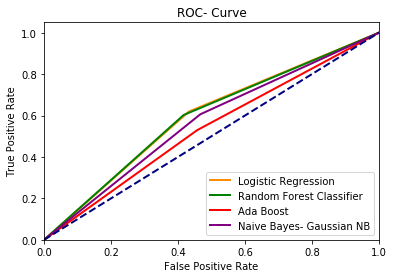

In [97]:
#Merge ROC Curve for each Classifier.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 2 #y.shape[1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
fpr_2, tpr_2, _ = roc_curve(y_test, predict)
fpr_3, tpr_3, _ = roc_curve(y_test,y_adaBoost)
fpr_4, tpr_4 ,_ = roc_curve(y_test,y_pred_naive)
#roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='Logistic Regression' % roc_auc)#ROC curve (area = %0.2f) - 
plt.plot(fpr_2, tpr_2, color='green',
             lw=lw, label ='Random Forest Classifier')#, label='ROC curve (area = %0.2f)' % roc_auc
plt.plot(fpr_3, tpr_3, color='red',
             lw=lw, label ='Ada Boost')#, label='ROC curve (area = %0.2f)' % roc_auc
plt.plot(fpr_4, tpr_4, color='purple',
           lw=lw, label ='Naive Bayes- Gaussian NB')#, label='ROC curve (area = %0.2f)' % roc_auc

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC- Curve')
plt.legend(loc="lower right")
plt.show()